In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier, MLPRegressor

### Questão 01

In [2]:
data = pd.read_csv('datasets/breast-cancer-wisconsin.csv', delimiter=';', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.shape

(699, 11)

In [9]:
X = data.iloc[:,1:10].values
y = data.iloc[:,10].values

### Questão 02

Feature 0 e 1


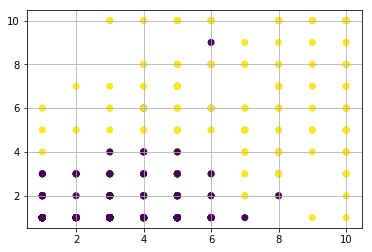

Feature 0 e 2


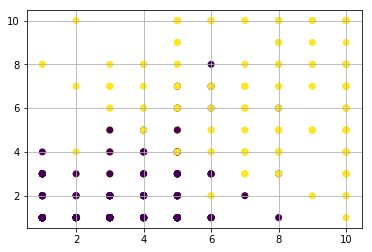

Feature 0 e 3


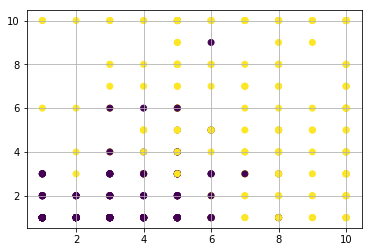

Feature 0 e 4


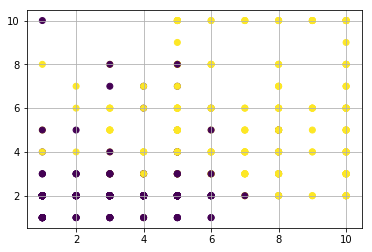

Feature 0 e 5


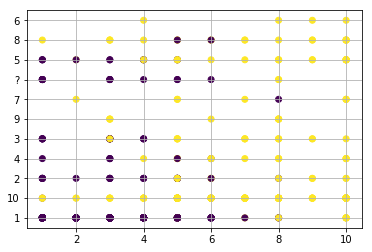

Feature 0 e 6


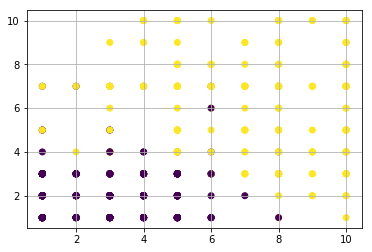

Feature 0 e 7


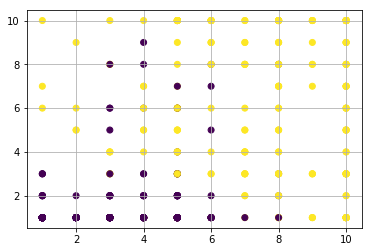

Feature 0 e 8


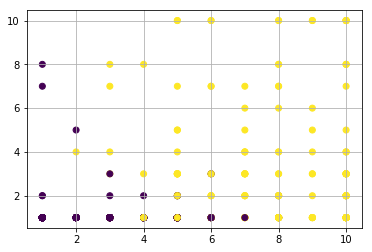

Feature 0 e 9


IndexError: index 9 is out of bounds for axis 1 with size 9

In [15]:
for i in range(0,10):
    for j in range(i+1,10):
        print('Feature {} e {}'.format(i,j))
        plt.scatter(X[:,i],X[:,j],c=y)
        plt.grid()
        plt.show()

Features: 0, 1 e 2

In [16]:
X = X[:,[0,1,2]]

In [17]:
X.shape

(699, 3)

### Questão 03

In [50]:
errors_mlpc = []
epochs = 15

In [51]:
model_mlpc = MLPClassifier(solver='sgd',learning_rate_init=0.01,max_iter=1,warm_start=True)

In [52]:
for i in range(1,epochs+1):
    errors_mlpc.append(1 - model_mlpc.fit(X,y).score(X,y))

/home/viviane/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


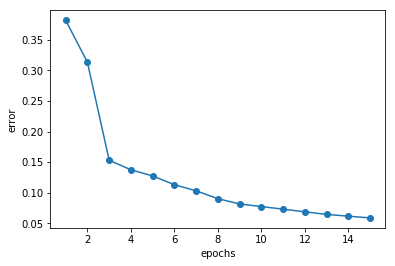

In [53]:
plt.plot(range(1,epochs+1),errors_mlpc,marker='o')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

### Questão 04

In [55]:
errors_mlpr = []

In [56]:
model_mlpr = MLPRegressor(solver='sgd',learning_rate_init=0.01,max_iter=1,warm_start=True)

In [57]:
for i in range(1,epochs+1):
    errors_mlpr.append(1 - model_mlpr.fit(X,y).score(X,y))

/home/viviane/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


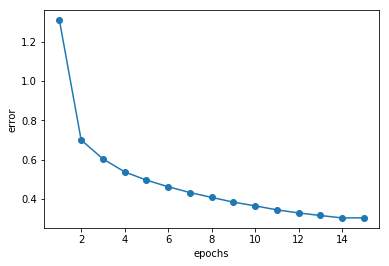

In [58]:
plt.plot(range(1,epochs+1),errors_mlpr,marker='o')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()